# Part A (NLP on the data) 

In [364]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [365]:
df = pd.read_csv('metadata.csv')
# Dropping complete null valued columns
column = ['mag_id', 'who_covidence_id', 'arxiv_id', 's2_id']
df = df.drop(column, axis=1)
df = df.dropna()
df.isnull().sum()
df = df.reset_index(drop=True)
df = df.loc[:999]

/Users/shaheryarasif/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [366]:
abst = df['title']+' '+df['abstract']

In [367]:
# Removing punctuations (Special Characters) and Tokenising (Splitting the data)
text_t = []
Tokenizer = RegexpTokenizer (r'\w+')
for i in range (len(abst)):
    [text_t.append(Tokenizer.tokenize(abst[i]))] 

In [368]:
# Removing stop words and lower casing the corpus
stop_words = set(stopwords.words('english'))
text_tt = []
for i in range (len(text_t)):
    text_tt.append([w for w in text_t[i] if not w in stop_words])

text_l = []
for i in range (len(text_tt)):
    text_l.append([l.lower() for l in text_tt[i]])  

In [407]:
# lemmatizing the Data to make more sense out of the corpus
from nltk.stem import WordNetLemmatizer 

text_s = []
lemmatizer = WordNetLemmatizer() 
for i in range (len(text_l)):
    text_s.append([lemmatizer.lemmatize(word) for word in text_l[i]])

In [460]:
# Applying TF-IDF to final preprocessed document and then storing the keywords in dataframe
from sklearn.feature_extraction.text import TfidfTransformer
import random

count=[]
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
for i in range (len(text_s)):
    tfIdf = tfIdfVectorizer.fit_transform(text_s[i])
    dff = pd.DataFrame(tfIdf.toarray(), columns=tfIdfVectorizer.get_feature_names())
    dff = dff.columns
    count.append(list(dff))
    # Document no. 179 consists of only 4 values
    if i == 178:
        keywords = random.sample(list(dff), 4)
        df['Keywords'].loc[i] = ",".join(keywords)
    else:
        keywords = random.sample(list(dff), 10)
        df['Keywords'].loc[i] = ",".join(keywords)

In [511]:
# Also using the CountVectorizer and Transformer combination
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

cv=CountVectorizer(max_df=0.85)
word_count_vector=[cv.fit_transform(v) for v in (text_s)]


tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_matrix=tfidf_transformer.fit_transform(word_count_vector[999])
feature_names = cv.get_feature_names() 

df_doc = pd.DataFrame(tfidf_transformer.idf_, index=feature_names, columns=["tfidf"]) 
df_doc=df_doc.sort_values(by=["tfidf"],ascending=False)
print (df_doc)

               tfidf
33          5.234107
particular  5.234107
putative    5.234107
pro         5.234107
previously  5.234107
...              ...
nols        4.135494
nucleolar   4.135494
protein     4.135494
we          4.135494
nucleolus   4.135494

[84 rows x 1 columns]


In [487]:
y = [len(count[i]) for i in range(len(count))]
x = [i for i in range (1000)]

In [488]:
len(x)

1000

<AxesSubplot:>

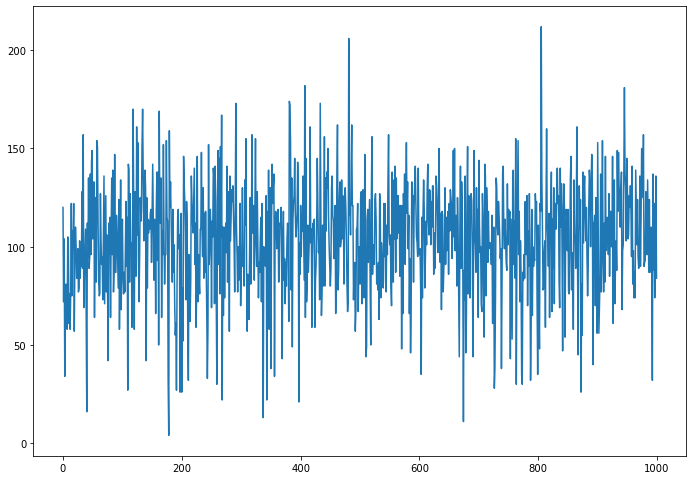

In [491]:
# Creating a graph to see how many keywords we've got from each document
import matplotlib.pyplot as plt
import seaborn as sns

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
d = (df['Keywords'])
sns.lineplot(data=d, x=x, y=y, ax=ax)

In [433]:
df['Keywords'].head(180)

0      identified,82,tract,quarter,associated,1997,pr...
1      operative,because,anti,elevated,property,lung,...
2      bronchiolar,surface,immune,molecule,addition,l...
3      play,smooth,airway,activity,key,role,mediator,...
4      several,review,mucosal,specific,important,rema...
                             ...                        
175    example,conclusion,also,unique,protein,ortholo...
176    protected,adenovirus,anti,immune,frequency,eli...
177    virus,respiratory,pneumonia,polyphaga,pathogen...
178               pandemic,influenza,resource,allocation
179    result,method,study,bound,possible,34,22,epide...
Name: Keywords, Length: 180, dtype: object

In [438]:
df.head(10)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,Keywords
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"identified,82,tract,quarter,associated,1997,pr..."
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"operative,because,anti,elevated,property,lung,..."
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"bronchiolar,surface,immune,molecule,addition,l..."
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"play,smooth,airway,activity,key,role,mediator,..."
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"several,review,mucosal,specific,important,rema..."
5,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...,"nascent,resembles,demonstrating,junction,base,..."
6,5yhe786e,3bb07ea10432f7738413dff9816809cc90f03f99,PMC,Debate: Transfusing to normal haemoglobin leve...,10.1186/cc987,PMC137267,11299062,no-cc,Recent evidence suggests that critically ill p...,2001-03-08,"Alvarez, Gonzalo; Hébert, Paul C; Szick, Sharyn",Crit Care,document_parses/pdf_json/3bb07ea10432f7738413d...,document_parses/pmc_json/PMC137267.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"red,patient,established,decrease,concentration..."
7,8zchiykl,5806726a24dc91de3954001effbdffd7a82d54e2,PMC,The 21st International Symposium on Intensive ...,10.1186/cc1013,PMC137274,11353930,no-cc,The 21st International Symposium on Intensive ...,2001-05-02,"Ball, Jonathan; Venn, Richard",Crit Care,document_parses/pdf_json/5806726a24dc91de39540...,document_parses/pmc_json/PMC137274.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"march,overall,acute,the,occurring,sense,debate..."
8,8qnrcgnk,faaf1022ccfe93b032c5608097a53543ba24aedb,PMC,Heme oxygenase-1 and carbon monoxide in pulmon...,10.1186/1465-9921-4-7,PMC193681,12964953,no-cc,"Heme oxygenase-1 (HO-1), an inducible stress p...",2003-

# Part B (Dumping Data on Elasticsearch)

In [449]:
len(d_json)

1000

In [ ]:
import json
d_json=json.loads(df.to_json(orient='records'))
d_json

In [441]:
keys = ['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 
                  'pubmed_id', 'license', 'abstract', 'publish_time', 
                  'authors', 'journal', 'pdf_json_files', 'Keywords', 'pmc_json_files'
                  , 'url']
def filterKeys(document):
    return {key: document[key] for key in keys }

In [ ]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers

es = Elasticsearch(['localhost:9200'])
es_client = Elasticsearch(http_compress=True)

def send_data(df): 
    for document in df:
        yield {
                "_index": 'covid',
                "_type": "articles",
                "_id": document['cord_uid'],
                "_source": filterKeys(document)
            }
    raise StopIteration

helpers.bulk(es_client, send_data(d_json))

In [448]:
def get_data():
    es = Elasticsearch(['localhost:9200'])
    data = es.search(index = 'covid', body={"query": {"match": {'Keywords':'nascent'}}})
    print (data)
    
get_data()

{'took': 3, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 2, 'relation': 'eq'}, 'max_score': 5.2942343, 'hits': [{'_index': 'covid', '_type': 'articles', '_id': 'zjufx4fo', '_score': 5.2942343, '_source': {'cord_uid': 'zjufx4fo', 'sha': 'b2897e1277f56641193a6db73825f707eed3e4c9', 'source_x': 'PMC', 'title': 'Sequence requirements for RNA strand transfer during nidovirus discontinuous subgenomic RNA synthesis', 'doi': '10.1093/emboj/20.24.7220', 'pmcid': 'PMC125340', 'pubmed_id': '11742998', 'license': 'green-oa', 'abstract': 'Nidovirus subgenomic mRNAs contain a leader sequence derived from the 5′ end of the genome fused to different sequences (‘bodies’) derived from the 3′ end. Their generation involves a unique mechanism of discontinuous subgenomic RNA synthesis that resembles copy-choice RNA recombination. During this process, the nascent RNA strand is transferred from one site in the template to another, during 

In [492]:
es.get(index='covid', doc_type="articles", id="zjufx4fo")

/Users/shaheryarasif/anaconda3/lib/python3.8/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: [types removal] Specifying types in document get requests is deprecated, use the /{index}/_doc/{id} endpoint instead.
  warnings.warn(message, category=ElasticsearchWarning)


{'_index': 'covid',
 '_type': 'articles',
 '_id': 'zjufx4fo',
 '_version': 1,
 '_seq_no': 5,
 '_primary_term': 1,
 'found': True,
 '_source': {'cord_uid': 'zjufx4fo',
  'sha': 'b2897e1277f56641193a6db73825f707eed3e4c9',
  'source_x': 'PMC',
  'title': 'Sequence requirements for RNA strand transfer during nidovirus discontinuous subgenomic RNA synthesis',
  'doi': '10.1093/emboj/20.24.7220',
  'pmcid': 'PMC125340',
  'pubmed_id': '11742998',
  'license': 'green-oa',
  'abstract': 'Nidovirus subgenomic mRNAs contain a leader sequence derived from the 5′ end of the genome fused to different sequences (‘bodies’) derived from the 3′ end. Their generation involves a unique mechanism of discontinuous subgenomic RNA synthesis that resembles copy-choice RNA recombination. During this process, the nascent RNA strand is transferred from one site in the template to another, during either plus or minus strand synthesis, to yield subgenomic RNA molecules. Central to this process are transcription-re